In [10]:
!pip install wordcloud

     |████████████████████████████████| 368kB 7.1MB/s eta 0:00:01


In [11]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays
import csv
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes
import requests
from bs4 import BeautifulSoup
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.0.2
Wordcloud is installed and imported!


In [55]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"


In [3]:
df_data_1.shape

(57, 3)

In [4]:
print(df_data_1.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [5]:
df_data_1['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Manhattan,13
Queens,13
The Bronx,9
Staten Island,3


In [6]:
CUISINE_WC = df_data_1[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,"Italian, Albanian (also known as ""Arthur Avenu..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [7]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [8]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

Use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [12]:
stopwords = set(STOPWORDS)

In [13]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

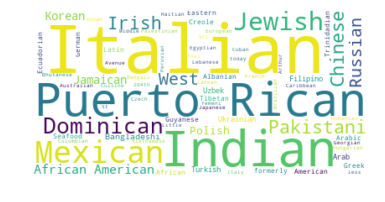

<Figure size 2160x3240 with 0 Axes>

In [14]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in New York City -
<u>
<li>Italian
<li>Purto Rican
<li>Mexican
<li>Jewish
<li>Indian
<li>Pakistani
<li>Dominican

<H4>BROOKLYN CUISINE - WORD CLOUD

In [16]:
Brooklyn_data = df_data_1[df_data_1['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst;,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani and Ukra..."


In [18]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukra..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,"African-American, Dominican, and Puerto Rican"


In [19]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

stopwords = set(STOPWORDS)

In [20]:
BRL_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BRL_CUISINE_WC.generate(BR_CUISINE_WC)

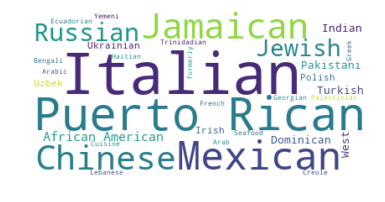

<Figure size 2160x3240 with 0 Axes>

In [21]:
plt.imshow(BRL_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Brooklyn is -
<ul>
<li>Italian
<li>Purto Rican
<li>Mexican

<H4>QUEENS CUISINE - WORD CLOUD

In [22]:
Queens_data = df_data_1[df_data_1['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, E..."
1,Queens,Bellerose,Indian and Pakistani
2,Queens,Flushing,Chinese and Korean
3,Queens,Forest Hills; Kew Gardens Hills; Rego Park,"Jewish, Russian and Uzbek"
4,Queens,Howard Beach; Ozone Park,Italian
5,Queens,Glendale,German and Polish
6,Queens,Jackson Heights,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."
7,Queens,Jamaica,"Bangladeshi, Caribbean; African-American; Afri..."
8,Queens,Little Neck,"Arab, Chinese, and Italian"
9,Queens,Richmond Hill; South Ozone Park,"Indian, Guyanese, Trinidadian, Pakistani, Bang..."


In [32]:
Q_WC = Queens_data[['Cuisine']]
Q_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, E..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Jewish, Russian and Uzbek"
4,Italian
5,German and Polish
6,"Indian, Pakistani, Bangladeshi, Colombian, Ecu..."
7,"Bangladeshi, Caribbean; African-American; Afri..."
8,"Arab, Chinese, and Italian"
9,"Indian, Guyanese, Trinidadian, Pakistani, Bang..."


In [33]:
Q_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)
Q_WC = open('Q_CUISINE.txt', 'r').read()
stopwords = set(STOPWORDS)

In [34]:
Q_WC_NYC= WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_WC_NYC.generate(Q_WC)

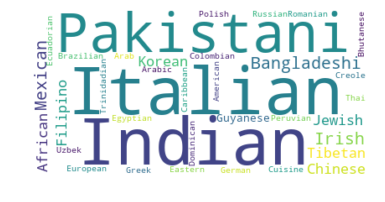

<Figure size 2160x3240 with 0 Axes>

In [35]:
plt.imshow(Q_WC_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Queens is -
<ul>
<li>Indian
<li>Irish
<li>Pakistani
<li>Mexican

<H4>MANHATTAN CUISINE - WORD CLOUD



In [36]:
Man_data = df_data_1[df_data_1['Borough']=='Manhattan'].reset_index(drop=True)
Man_data

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,Chinese and Vietnamese
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cub..."
2,Manhattan,East Village,"Japanese, Korean, Indian and Ukrainian"
3,Manhattan,Greenwich Village,Italian and Middle Eastern
4,Manhattan,Harlem,"Italian, African-American, Latin American, We..."
5,Manhattan,Koreatown,Korean
6,Manhattan,Nolita,Australian
7,Manhattan,Little Italy,Italian
8,Manhattan,Lower East Side,"Puerto Rican, Jewish, Italian, and Latin Amer..."
9,Manhattan,Murray Hill,"Indian, Pakistani and Bangladeshi"


In [45]:
Man_data_wc = Man_data[['Cuisine']]
Man_data_wc

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese-Cub..."
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian and Middle Eastern
4,"Italian, African-American, Latin American, We..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, and Latin Amer..."
9,"Indian, Pakistani and Bangladeshi"


In [46]:
Man_data_wc.to_csv('Man_cuisine.txt', sep=',', index=False)
Man_data_wc = open('Man_cuisine.txt', 'r').read()

In [47]:
stopword= set(STOPWORDS)

In [50]:
Man_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

Man_NYC.generate(Man_data_wc)

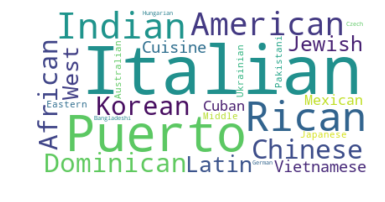

<Figure size 2160x3240 with 0 Axes>

In [51]:
plt.imshow(Man_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in Manhattan is -
<ul>
<li>Italian
<li>American
<li>Puerto Rican
<li>Indian

<H4>THE BRONX CUISINE - WORD CLOUD

In [53]:
Br_data = df_data_1[df_data_1['Borough']=='The Bronx'].reset_index(drop=True)
Br_data

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"
5,The Bronx,Riverdale,Jewish
6,The Bronx,South Bronx,"Puerto Rican, Dominican"
7,The Bronx,Wakefield,"Jamaican, West Indian"
8,The Bronx,Woodlawn,Irish


In [58]:
Br_wc = Br_data[['Cuisine']]
Br_wc

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,"Italian, Albanian (also known as ""Arthur Avenu..."
2,"Italian, Seafood"
3,"Italian, Albanian"
4,"Filipino (formerly Irish, less so today)"
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [59]:
Br_wc.to_csv('Br_cusine.txt', sep=',', index=False)
Br_wc = open('Br_cusine.txt','r').read()

In [60]:
stopwords = set(STOPWORDS)

In [61]:
Br_NYC = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords=stopwords
)
Br_NYC.generate(Br_wc)

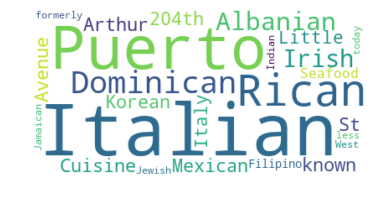

<Figure size 2160x3240 with 0 Axes>

In [63]:
plt.imshow(Br_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most Preferred Food in The Bronx is -
<ul>
<li>Italian
<li>Puerto Rican
<li>Albanian
<li>Dominican